<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/Assignment14_Decisiontree(fraudcheck).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import statistics as stat
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [148]:
#importing dataset
fd = pd.read_csv("/content/Fraud_check (1).csv")
fd.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [149]:
#getting information of dataset
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [150]:
fd.shape

(600, 6)

In [151]:
fd.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [152]:
fd.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [153]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
fd=pd.get_dummies(fd,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [154]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
fd["TaxInc"] = pd.cut(fd["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [155]:
fd.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


In [156]:
#### Correlation Matrix
corr = fd.corr()
corr

<ipython-input-156-72f02257416b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = fd.corr()


,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
Taxable.Income,1.000000,-0.064387,-0.001818,-0.049232,-0.100611,0.037910,0.070628
City.Population,-0.064387,1.000000,0.013135,0.079579,-0.007035,0.002087,-0.040098
Work.Experience,-0.001818,0.013135,1.000000,-0.005362,0.033347,-0.018123,-0.094559
Undergrad_YES,-0.049232,0.079579,-0.005362,1.000000,0.015120,0.028883,-0.000267
Marital.Status_Married,-0.100611,-0.007035,0.033347,0.015120,1.000000,-0.520317,0.016771
Marital.Status_Single,0.037910,0.002087,-0.018123,0.028883,-0.520317,1.000000,0.047014
Urban_YES,0.070628,-0.040098,-0.094559,-0.000267,0.016771,0.047014,1.000000


<Axes: >

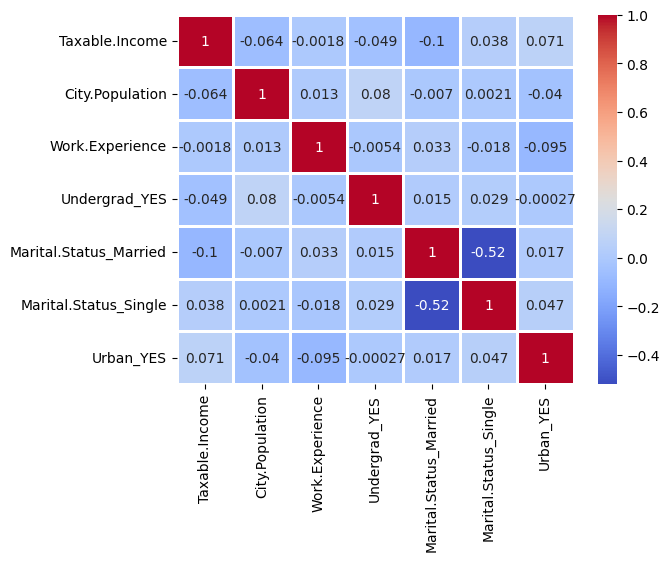

In [157]:
#Correlation Plot
fig, ax = plt.subplots()
#fig.set_size_inches(15, 10)
sns.heatmap(corr,cmap='coolwarm',annot=True,linewidths=2)

Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [158]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
fd = pd.get_dummies(fd,columns = ["TaxInc"],drop_first=True)

In [159]:
fd.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


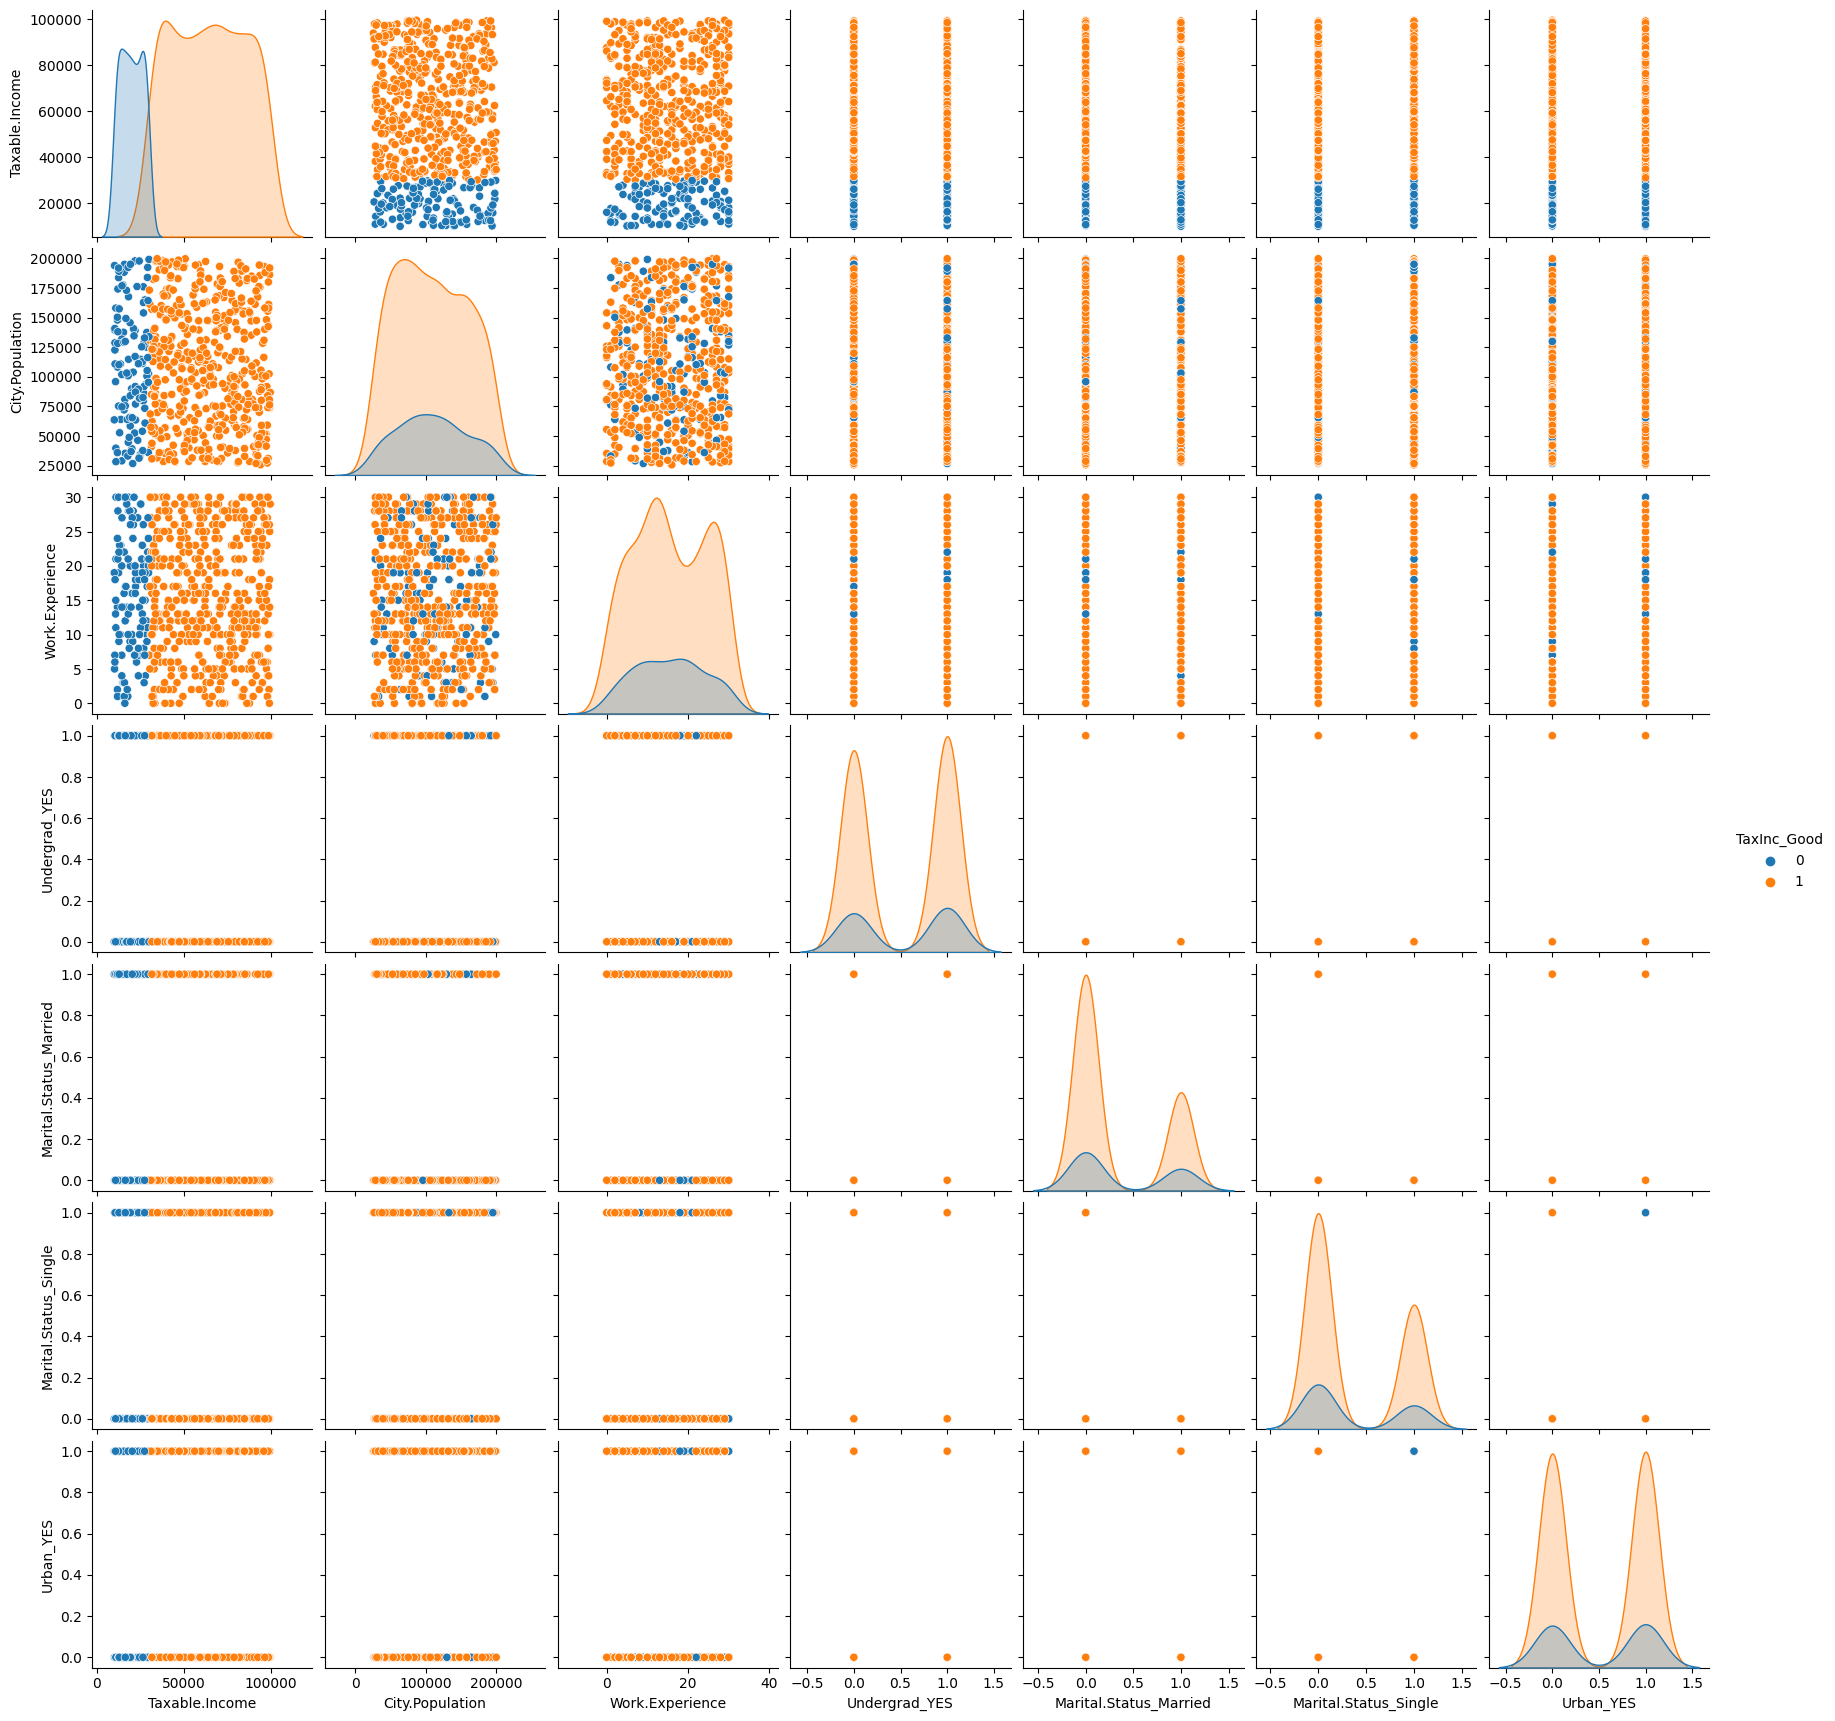

In [160]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=fd, hue = 'TaxInc_Good')

In [161]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [162]:
# Normalized data frame (considering the numerical part of data)
fd_norm = norm_func(fd.iloc[:,1:])
fd_norm.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0


In [163]:
# Declaring features & target
x = fd_norm.drop(['TaxInc_Good'], axis=1)
y = fd_norm['TaxInc_Good']

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
# Splitting data into train & test
x_train, x_test, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [166]:
##Converting the Taxable income variable to bucketing. 
fd_norm["income"]="<=30000"
fd_norm.loc[fd["Taxable.Income"]>=30000,"income"]="Good"
fd_norm.loc[fd["Taxable.Income"]<=30000,"income"]="Risky"

In [167]:
##Droping the Taxable income variable
fd.drop(["Taxable.Income"],axis=1,inplace=True)

In [168]:
fd.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [169]:
# Splitting the data into featuers and labels
features = fd.iloc[:,0:5]
labels = fd.iloc[:,5]

In [170]:
# Splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [171]:
#Performance Report
def generateClassificationReport(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))    
    print('accuracy is ',accuracy_score(y_test,y_pred))

In [172]:
#from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.metrics import confusion_matrix

In [173]:
#Fitting Model, Predict, Evaluation
model = DecisionTreeClassifier()
acc1 = []
model.fit(x_train, y_train)
target_pred = model.predict(x_test)
generateClassificationReport(y_test,target_pred)
acc1.append(accuracy_score(y_test,target_pred))

print("\n Accuracy: ",stat.mean(acc1))

              precision    recall  f1-score   support

           0       0.43      0.38      0.40        60
           1       0.44      0.48      0.46        60

    accuracy                           0.43       120
   macro avg       0.43      0.43      0.43       120
weighted avg       0.43      0.43      0.43       120

[[23 37]
 [31 29]]
accuracy is  0.43333333333333335

 Accuracy:  0.43333333333333335


In [174]:
#Over Sampling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
#Apply Over Sampling
print('Before Oversampling')
print(sorted(Counter(y_train).items()))
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
print('After Oversampling')
print(sorted(Counter(y_train).items()))

Before Oversampling
[(0.0, 79), (1.0, 341)]
After Oversampling
[(0.0, 341), (1.0, 341)]


In [175]:
#Fitting Model
model = DecisionTreeClassifier()
acc = []
model.fit(x_train, y_train)
target_pred = model.predict(x_test)
generateClassificationReport(y_test,target_pred)
acc.append(accuracy_score(y_test,target_pred))
print("\n Accuracy: ",stat.mean(acc))

              precision    recall  f1-score   support

         0.0       0.14      0.18      0.16        45
         1.0       0.70      0.64      0.67       135

    accuracy                           0.52       180
   macro avg       0.42      0.41      0.41       180
weighted avg       0.56      0.52      0.54       180

[[ 8 37]
 [49 86]]
accuracy is  0.5222222222222223

 Accuracy:  0.5222222222222223


*undersampling*

In [176]:
from imblearn.under_sampling import RandomUnderSampler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
#Apply Random Under Sampling
rus = RandomUnderSampler(random_state=0)
x_train, y_train =rus.fit_resample(x_train, y_train)

In [177]:
#Fitting Model
model = DecisionTreeClassifier()
acc2 = []
model.fit(x_train, y_train)
target_pred = model.predict(x_test)
generateClassificationReport(y_test,target_pred)
acc2.append(accuracy_score(y_test,target_pred))

print("\n Accuracy: ",stat.mean(acc2))

              precision    recall  f1-score   support

         0.0       0.21      0.46      0.29        41
         1.0       0.76      0.49      0.59       139

    accuracy                           0.48       180
   macro avg       0.48      0.48      0.44       180
weighted avg       0.63      0.48      0.52       180

[[19 22]
 [71 68]]
accuracy is  0.48333333333333334

 Accuracy:  0.48333333333333334


0.43333333333333335
0.5222222222222223
0.48333333333333334


<BarContainer object of 3 artists>

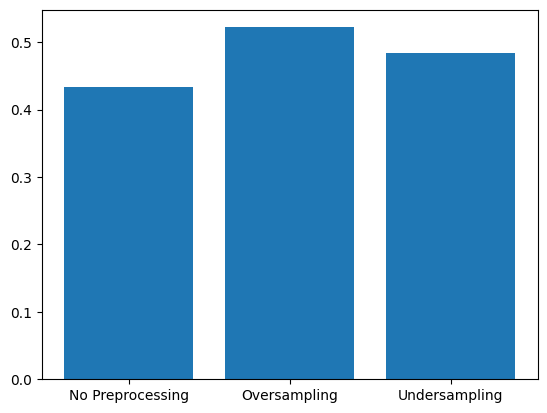

In [178]:
import matplotlib.pyplot as plt
print(stat.mean(acc1))
print(stat.mean(acc))
print(stat.mean(acc2))

data = {'No Preprocessing': stat.mean(acc1), 'Oversampling': stat.mean(acc), 'Undersampling': stat.mean(acc2)}
names = list(data.keys())
values = list(data.values())

#fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
plt.bar(names, values)

In [179]:
#model 2-Entropy based splits
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

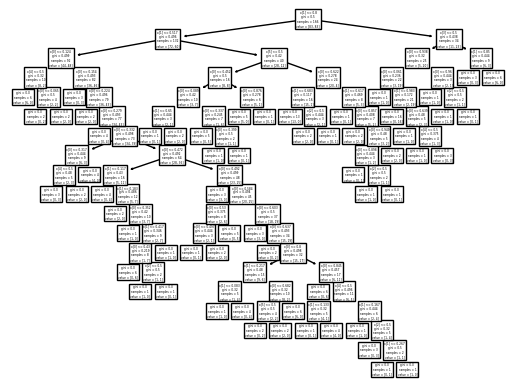

In [180]:
# PLotting the decision tree
from sklearn import tree
tree.plot_tree(model);

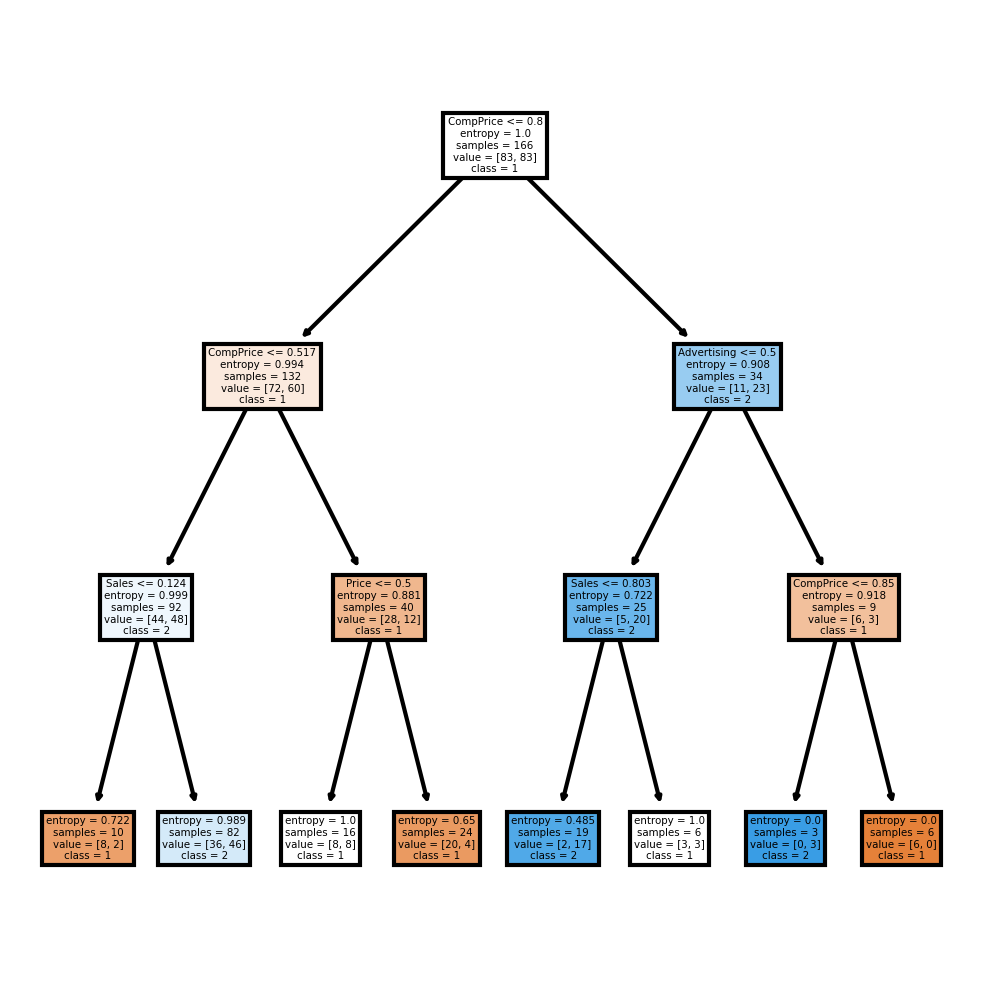

In [181]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [182]:
#model 1-Entropy based splits
dt1_entropy = tree.DecisionTreeClassifier(criterion='entropy',max_depth =3)
dt1_entropy.fit(x_train, y_train)
print('Train Accuracy =',dt1_entropy.score(x_train, y_train))
print('Test Accuracy =',dt1_entropy.score(x_test, y_test))


Train Accuracy = 0.6686746987951807
Test Accuracy = 0.5333333333333333


Building Decision Tree Classifier (CART) using Gini Criteria

In [183]:
# Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1.0    90
0.0    90
dtype: int64

In [184]:
preds

array([1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0.])

In [185]:
pd.crosstab(y_test,preds)

col_0,0.0,1.0
TaxInc_Good,,
0.0,19,22
1.0,71,68


In [186]:
# Accuracy 
np.mean(preds==y_test)

0.48333333333333334

In [187]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [188]:
# Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.48333333333333334

In [189]:
## Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix
print("Train - Confusion Matrix")
print(confusion_matrix(y_train,model_gini.predict(x_train)))
print("Test - Confusion Matrix")
print(confusion_matrix(y_test,model_gini.predict(x_test)))

Train - Confusion Matrix
[[44 39]
 [15 68]]
Test - Confusion Matrix
[[13 28]
 [55 84]]


In [190]:
## Important variables
features = x_train.columns
importances = model_gini.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([x_train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5
0,Work.Experience,City.Population,Marital.Status_Married,Urban_YES,Marital.Status_Single,Undergrad_YES
1,0.515944,0.208891,0.158128,0.117036,0.0,0.0


In [191]:
importances

array([0.20889077, 0.51594446, 0.        , 0.15812831, 0.        ,
       0.11703646])

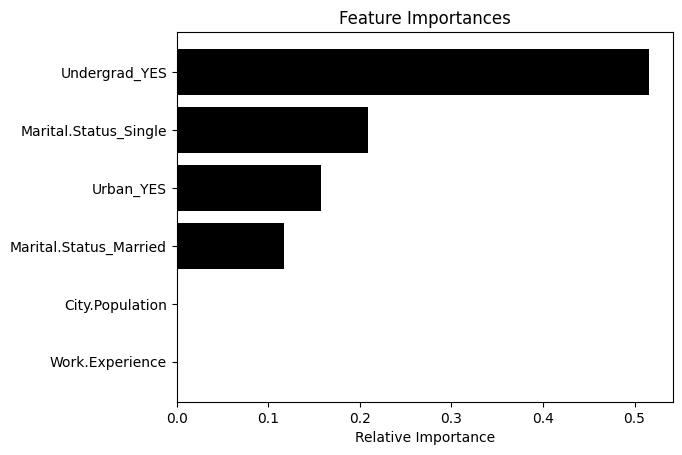

In [192]:
fig, ax = plt.subplots()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices][::-1], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [193]:
#Building Decision Tree Model using Variable Importance
indices

array([1, 0, 3, 5, 4, 2])

In [194]:
select = indices[0:5]
imp_tree = tree.DecisionTreeClassifier(max_depth=3)   ## Instantiating DecisionTree-Classifier
clf = imp_tree.fit(x_train.iloc[:,select], y_train)

In [195]:
print('Train Accuracy =',imp_tree.score(x_train.iloc[:,select], y_train))
print('Test Accuracy =',imp_tree.score(x_test.iloc[:,select], y_test))

Train Accuracy = 0.6746987951807228
Test Accuracy = 0.5388888888888889


In [196]:
## Randomized Hyper-parameter search with cross-validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

dt = tree.DecisionTreeClassifier() 

param_grid = {'criterion':['gini','entropy'],
             'max_leaf_nodes': np.arange(5,30,1),
             'max_depth':np.arange(3,15,1),
             }


rsearch_acc = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,n_iter=500)
rsearch_acc.fit(x_train, y_train)

print(rsearch_acc.best_estimator_)
print('Train Accuracy =',rsearch_acc.best_score_)
print('Test Accuracy =',rsearch_acc.score(x_test, y_test))

print("Train - Confusion Matrix")
print(confusion_matrix(y_train,rsearch_acc.predict(x_train)))
print("Test - Confusion Matrix")
print(confusion_matrix(y_test,rsearch_acc.predict(x_test)))

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=28)
Train Accuracy = 0.5668449197860962
Test Accuracy = 0.5888888888888889
Train - Confusion Matrix
[[47 36]
 [ 0 83]]
Test - Confusion Matrix
[[14 27]
 [47 92]]


In [197]:
#using K fold method
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [198]:
# Applying K-Fold Cross Validation
scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.47058824 0.52941176 0.47058824 0.52941176 0.47058824 0.41176471
 0.375      0.625      0.5625     0.4375    ]


In [199]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.4882


In [200]:
### Making predictions
predicted= pd.DataFrame(rsearch_acc.predict(x_train))
fd['predicted'] = predicted
fd.to_csv("fraud_predictions.csv")